# Example of the `aitlas` toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the `aitlas` toolbox.

## Import the required packages

In [1]:
from aitlas.datasets import MassachusettsBuildingsDataset
from aitlas.models import DeepLabV3
from aitlas.utils import image_loader
from aitlas.transforms import MinMaxNormTranspose

/home/dragik/anaconda3/envs/aitlas/lib/python3.8/site-packages/skimage/restoration/inpaint.py:6: DeprecationWarning: Please use `laplace` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import laplace
/home/dragik/anaconda3/envs/aitlas/lib/python3.8/site-packages/skimage/filters/_unsharp_mask.py:2: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter
/home/dragik/anaconda3/envs/aitlas/lib/python3.8/site-packages/skimage/segmentation/random_walker_segmentation.py:49: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(scipy.__version__) >= Version('1.1'):
/home/dragik/anaconda3/envs/aitlas/lib/python3.8/site-packages/albumentations/augmentations/geometric/functional.py:6: DeprecationWarning: Please use `gaussian_filter` from the `

## Visualize images and masks

Total number of patches: 1232


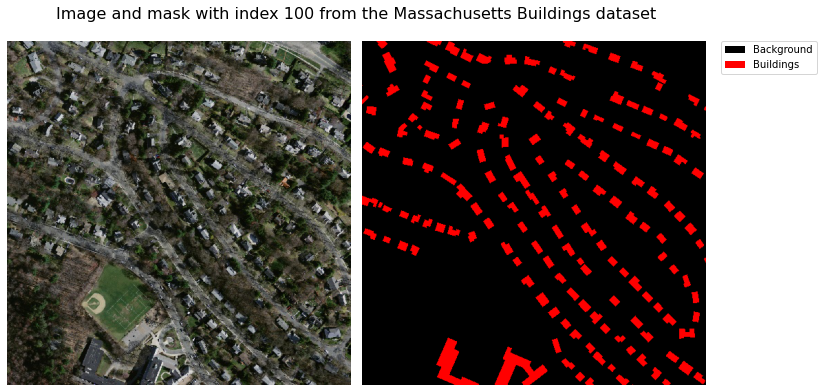

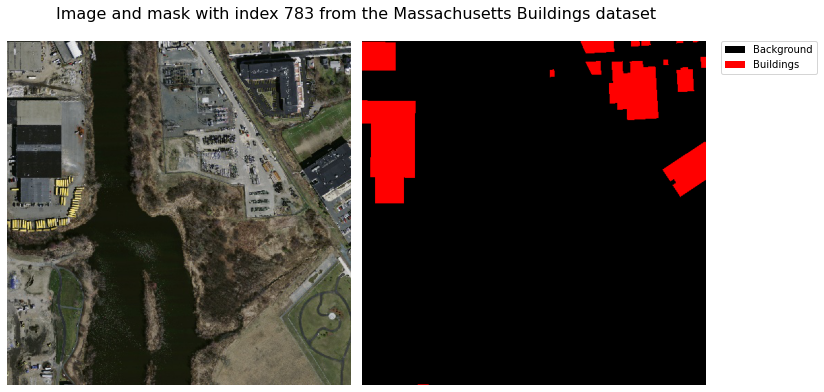

In [2]:
dataset_config = {
    "data_dir": "../data/MassachusettsBuildings/train_splits",
    "csv_file": "../data/MassachusettsBuildings/train.txt"
}
dataset = MassachusettsBuildingsDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(100);
dataset.show_image(783);

In [3]:
dataset.data_distribution_table()

,Number of pixels
Background,267324656.0
Buildings,40675356.0


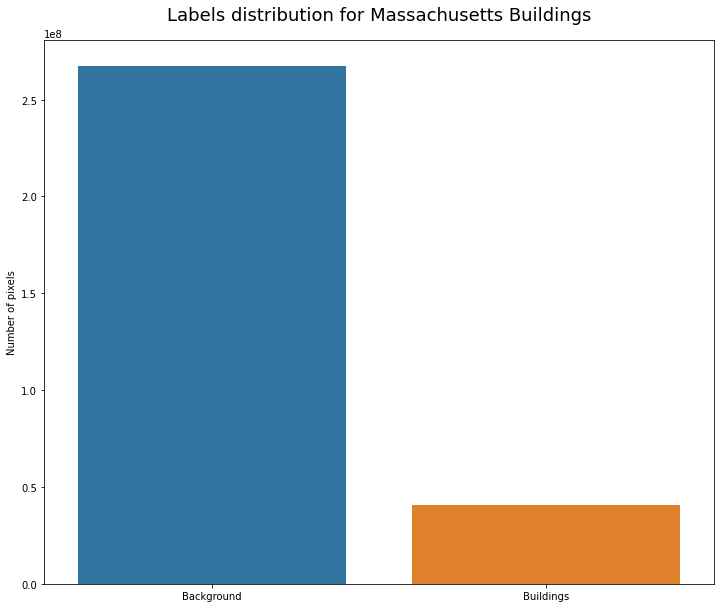

In [4]:
dataset.data_distribution_barchart();

## Load train data

In [5]:
train_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "data_dir": "../data/MassachusettsBuildings/train_splits",
    "csv_file": "../data/MassachusettsBuildings/train.txt",
    "joint_transforms": ["aitlas.transforms.FlipHVRandomRotate"],
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}
train_dataset = MassachusettsBuildingsDataset(train_dataset_config)

validation_dataset_config = {
    "batch_size": 16,
    "shuffle": False,
    "data_dir": "../data/MassachusettsBuildings/val_splits",
    "csv_file": "../data/MassachusettsBuildings/val.txt",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}
validation_dataset = MassachusettsBuildingsDataset(validation_dataset_config)

len(train_dataset), len(validation_dataset)

(1232, 36)

## Create the model

In [6]:
epochs = 50
model_directory = "./experiments/MassachusettsBuildings"
model_config = {
    "num_classes": 2, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [7]:
model.train_and_evaluate_model(
    train_dataset=train_dataset,
    val_dataset=validation_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
)

2022-10-30 22:32:19,623 INFO Starting training.
training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:54<00:00,  1.40it/s]
2022-10-30 22:33:14,705 INFO epoch: 1, time: 55, loss:  0.48901
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.25it/s]
2022-10-30 22:33:34,220 INFO IOU:0.7888727343053672, IOU mean:0.6543582251460311, IOU per Class:[0.86673962 0.44197683]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.18it/s]
2022-10-30 22:33:35,608 INFO IOU:0.8124643359073214, IOU mean:0.6608345734180464, IOU per Class:[0.88413765 0.4375315 ]
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 0 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:54<00:00,  1.40it/s]
2022-10-30 22:34:30,520 INFO epoch: 2, time: 55, loss:  0.34272
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.17it/s]
2022-10-30 22:34:48,997 INFO IOU:0.8323156873793518, IOU mean:0.694682127122658, IOU per Class:[0.89858389 0.49078036]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.11it/s]
2022-10-30 22:34:50,429 INFO IOU:0.8651404694251075, IOU mean:0.7191349477995309, IOU per Class:[0.92052496 0.51774494]
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 1 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.39it/s]
2022-10-30 22:35:45,725 INFO epoch: 3, time: 55, loss:  0.28716
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.17it/s]
2022-10-30 22:36:04,208 INFO IOU:0.8396502865077392, IOU mean:0.7024407427227839, IOU per Class:[0.90451213 0.50036936]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.33it/s]
2022-10-30 22:36:05,509 INFO IOU:0.8722645637824857, IOU mean:0.727806261804618, IOU per Class:[0.92588816 0.52972437]
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 2 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 22:37:00,743 INFO epoch: 4, time: 55, loss:  0.25374
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.18it/s]
2022-10-30 22:37:19,202 INFO IOU:0.8512236043333136, IOU mean:0.7077470842140483, IOU per Class:[0.91245798 0.50303619]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.22it/s]
2022-10-30 22:37:20,563 INFO IOU:0.882299451460092, IOU mean:0.7318494308077077, IOU per Class:[0.93260008 0.53109878]
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 3 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:54<00:00,  1.40it/s]
2022-10-30 22:38:15,464 INFO epoch: 5, time: 55, loss:  0.23200
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.15it/s]
2022-10-30 22:38:34,041 INFO IOU:0.8553556007819042, IOU mean:0.7142550177706579, IOU per Class:[0.91508853 0.5134215 ]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.17it/s]
2022-10-30 22:38:35,437 INFO IOU:0.8826133584688294, IOU mean:0.729405670365572, IOU per Class:[0.93291273 0.52589861]
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 4 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:54<00:00,  1.40it/s]
2022-10-30 22:39:30,524 INFO epoch: 6, time: 55, loss:  0.21563
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.20it/s]
2022-10-30 22:39:48,913 INFO IOU:0.8548002450371216, IOU mean:0.7175150654222286, IOU per Class:[0.91439129 0.52063884]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.26it/s]
2022-10-30 22:39:50,255 INFO IOU:0.8890707993394457, IOU mean:0.7449712004851696, IOU per Class:[0.93670062 0.55324178]
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 5 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:54<00:00,  1.40it/s]
2022-10-30 22:40:45,207 INFO epoch: 7, time: 55, loss:  0.20681
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.17it/s]
2022-10-30 22:41:03,685 INFO IOU:0.8613796981286506, IOU mean:0.7187329496505148, IOU per Class:[0.91912479 0.51834111]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.06it/s]
2022-10-30 22:41:05,149 INFO IOU:0.8878320719602848, IOU mean:0.7334240887783239, IOU per Class:[0.93636802 0.53048016]
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 6 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 22:42:00,253 INFO epoch: 8, time: 55, loss:  0.19762
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.16it/s]
2022-10-30 22:42:18,773 INFO IOU:0.8614565332229777, IOU mean:0.7340012046870369, IOU per Class:[0.91811355 0.54988886]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.10it/s]
2022-10-30 22:42:20,213 INFO IOU:0.8901798398916394, IOU mean:0.7550230431571273, IOU per Class:[0.93695001 0.57309608]
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 7 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 22:43:15,450 INFO epoch: 9, time: 55, loss:  0.19025
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.17it/s]
2022-10-30 22:43:33,964 INFO IOU:0.866587305970949, IOU mean:0.7301727147520274, IOU per Class:[0.92201741 0.53832802]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.23it/s]
2022-10-30 22:43:35,319 INFO IOU:0.895360886782783, IOU mean:0.7552085737214467, IOU per Class:[0.94042193 0.56999521]
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 8 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 22:44:30,475 INFO epoch: 10, time: 55, loss:  0.18754
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.14it/s]
2022-10-30 22:44:49,085 INFO IOU:0.8042305423445929, IOU mean:0.6708638735273205, IOU per Class:[0.88202033 0.45970742]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.08it/s]
2022-10-30 22:44:50,536 INFO IOU:0.7636959229141996, IOU mean:0.6121668198463223, IOU per Class:[0.85820788 0.36612576]
2022-10-30 22:44:50,537 INFO INFO: Early stopping counter 1 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 9 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:54<00:00,  1.40it/s]
2022-10-30 22:45:45,521 INFO epoch: 11, time: 55, loss:  0.18176
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.23it/s]
2022-10-30 22:46:05,232 INFO IOU:0.8690766815380825, IOU mean:0.7396827334511893, IOU per Class:[0.92317664 0.55618883]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.26it/s]
2022-10-30 22:46:06,570 INFO IOU:0.89264650595965, IOU mean:0.7540266759547456, IOU per Class:[0.93862499 0.56942836]
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 10 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 22:47:01,668 INFO epoch: 12, time: 55, loss:  0.18014
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.22it/s]
2022-10-30 22:47:19,936 INFO IOU:0.8374295675538274, IOU mean:0.7153802716556952, IOU per Class:[0.90163169 0.52912886]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.15it/s]
2022-10-30 22:47:21,342 INFO IOU:0.8711083938776586, IOU mean:0.7385170548721317, IOU per Class:[0.92458064 0.55245347]
2022-10-30 22:47:21,343 INFO INFO: Early stopping counter 1 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 11 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:54<00:00,  1.40it/s]
2022-10-30 22:48:16,333 INFO epoch: 13, time: 55, loss:  0.17952
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.18it/s]
2022-10-30 22:48:34,782 INFO IOU:0.8708320394645103, IOU mean:0.7386931544037341, IOU per Class:[0.92446949 0.55291682]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.14it/s]
2022-10-30 22:48:36,195 INFO IOU:0.897795947761858, IOU mean:0.7580850633149653, IOU per Class:[0.94187689 0.57429324]
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 12 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 22:49:31,302 INFO epoch: 14, time: 55, loss:  0.17506
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.21it/s]
2022-10-30 22:49:49,643 INFO IOU:0.8709288259037589, IOU mean:0.7427134394871759, IOU per Class:[0.92430107 0.56112581]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.26it/s]
2022-10-30 22:49:50,979 INFO IOU:0.898889994101897, IOU mean:0.7628080685187658, IOU per Class:[0.94242759 0.58318855]
2022-10-30 22:49:50,981 INFO INFO: Early stopping counter 1 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 13 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.39it/s]
2022-10-30 22:50:46,249 INFO epoch: 15, time: 56, loss:  0.17157
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.19it/s]
2022-10-30 22:51:04,677 INFO IOU:0.8726619790969542, IOU mean:0.7412066923596602, IOU per Class:[0.92562519 0.55678819]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.89it/s]
2022-10-30 22:51:06,278 INFO IOU:0.8964801951448119, IOU mean:0.7548889831109447, IOU per Class:[0.94115494 0.56862302]
2022-10-30 22:51:06,279 INFO INFO: Early stopping counter 2 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 14 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 22:52:01,324 INFO epoch: 16, time: 55, loss:  0.16966
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.17it/s]
2022-10-30 22:52:19,818 INFO IOU:0.8734185876101063, IOU mean:0.7540998107010628, IOU per Class:[0.92538471 0.58281491]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.17it/s]
2022-10-30 22:52:21,211 INFO IOU:0.9014381923308027, IOU mean:0.7772947239048351, IOU per Class:[0.9435601  0.61102935]
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 15 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:54<00:00,  1.40it/s]
2022-10-30 22:53:16,257 INFO epoch: 17, time: 55, loss:  0.17385
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.21it/s]
2022-10-30 22:53:34,581 INFO IOU:0.8731005286024239, IOU mean:0.747619386844694, IOU per Class:[0.92555982 0.56967896]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.11it/s]
2022-10-30 22:53:36,014 INFO IOU:0.8997475290095732, IOU mean:0.767601094451386, IOU per Class:[0.94281192 0.59239027]
2022-10-30 22:53:36,015 INFO INFO: Early stopping counter 1 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 16 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 22:54:31,074 INFO epoch: 18, time: 55, loss:  0.17014
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.20it/s]
2022-10-30 22:54:49,439 INFO IOU:0.8718665451328315, IOU mean:0.7551900853069251, IOU per Class:[0.92418271 0.58619746]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.15it/s]
2022-10-30 22:54:50,848 INFO IOU:0.8980391937699774, IOU mean:0.77125415620642, IOU per Class:[0.94152416 0.60098416]
2022-10-30 22:54:50,849 INFO INFO: Early stopping counter 2 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 17 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 22:55:45,981 INFO epoch: 19, time: 55, loss:  0.16610
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.16it/s]
2022-10-30 22:56:04,509 INFO IOU:0.8735672415251327, IOU mean:0.7494218019274854, IOU per Class:[0.92599756 0.57284605]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.92it/s]
2022-10-30 22:56:06,089 INFO IOU:0.8978089583410654, IOU mean:0.7617314980289733, IOU per Class:[0.94177242 0.58169058]
2022-10-30 22:56:06,090 INFO INFO: Early stopping counter 3 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 18 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:54<00:00,  1.40it/s]
2022-10-30 22:57:01,059 INFO epoch: 20, time: 55, loss:  0.16607
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.17it/s]
2022-10-30 22:57:19,553 INFO IOU:0.8750125045243435, IOU mean:0.7476725871167411, IOU per Class:[0.92692095 0.56842422]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.18it/s]
2022-10-30 22:57:20,943 INFO IOU:0.8985699992215874, IOU mean:0.7616948972494268, IOU per Class:[0.94227892 0.58111088]
2022-10-30 22:57:20,944 INFO INFO: Early stopping counter 4 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 19 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 22:58:16,097 INFO epoch: 21, time: 56, loss:  0.16546
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.15it/s]
2022-10-30 22:58:36,104 INFO IOU:0.8748879135858676, IOU mean:0.7426867010719562, IOU per Class:[0.92711265 0.55826076]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.20it/s]
2022-10-30 22:58:37,482 INFO IOU:0.8972960928103143, IOU mean:0.754113986333566, IOU per Class:[0.94173771 0.56649027]
2022-10-30 22:58:37,484 INFO INFO: Early stopping counter 5 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 20 0.0001


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 22:59:32,644 INFO epoch: 22, time: 55, loss:  0.16364
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.21it/s]
2022-10-30 22:59:50,945 INFO IOU:0.8759858501724114, IOU mean:0.7480729721323711, IOU per Class:[0.92758245 0.5685635 ]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.06it/s]
2022-10-30 22:59:52,410 INFO IOU:0.897880285763509, IOU mean:0.7602137463733931, IOU per Class:[0.94188075 0.57854674]
2022-10-30 22:59:52,411 INFO INFO: Early stopping counter 6 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 21 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.39it/s]
2022-10-30 23:00:47,616 INFO epoch: 23, time: 55, loss:  0.16059
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.16it/s]
2022-10-30 23:01:06,153 INFO IOU:0.8777295499849188, IOU mean:0.7563861296567986, IOU per Class:[0.92838017 0.58439209]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.07it/s]
2022-10-30 23:01:07,615 INFO IOU:0.903011531843763, IOU mean:0.7766355647436521, IOU per Class:[0.94463099 0.60864014]
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 22 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:54<00:00,  1.40it/s]
2022-10-30 23:02:02,595 INFO epoch: 24, time: 55, loss:  0.15962
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.20it/s]
2022-10-30 23:02:20,968 INFO IOU:0.8778046086072772, IOU mean:0.7551055873795873, IOU per Class:[0.92860301 0.58160816]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.27it/s]
2022-10-30 23:02:22,300 INFO IOU:0.90315723035724, IOU mean:0.7755546517067267, IOU per Class:[0.94476962 0.60633969]
2022-10-30 23:02:22,302 INFO INFO: Early stopping counter 1 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 23 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 23:03:17,360 INFO epoch: 25, time: 55, loss:  0.15927
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.15it/s]
2022-10-30 23:03:35,956 INFO IOU:0.8796313862924585, IOU mean:0.759446546478107, IOU per Class:[0.92953242 0.58936068]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.07it/s]
2022-10-30 23:03:37,420 INFO IOU:0.9033590792499768, IOU mean:0.7769090583018217, IOU per Class:[0.94484343 0.60897469]
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 24 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 23:04:32,588 INFO epoch: 26, time: 55, loss:  0.15829
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.17it/s]
2022-10-30 23:04:51,098 INFO IOU:0.8790878884998966, IOU mean:0.7572592956861982, IOU per Class:[0.929228   0.58529059]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.14it/s]
2022-10-30 23:04:52,512 INFO IOU:0.9042193459911104, IOU mean:0.7771092213442299, IOU per Class:[0.94540314 0.6088153 ]
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 25 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 23:05:47,690 INFO epoch: 27, time: 55, loss:  0.15742
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.18it/s]
2022-10-30 23:06:06,123 INFO IOU:0.8786109889912597, IOU mean:0.7566858258861779, IOU per Class:[0.92899409 0.58437756]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.21it/s]
2022-10-30 23:06:07,494 INFO IOU:0.9035700814424267, IOU mean:0.7762544894536654, IOU per Class:[0.94500662 0.60750236]
2022-10-30 23:06:07,495 INFO INFO: Early stopping counter 1 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 26 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 23:07:02,618 INFO epoch: 28, time: 55, loss:  0.15716
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.23it/s]
2022-10-30 23:07:20,861 INFO IOU:0.8803717672945158, IOU mean:0.760793112695073, IOU per Class:[0.92991482 0.59167141]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.40it/s]
2022-10-30 23:07:22,123 INFO IOU:0.9043494258107112, IOU mean:0.7798006607480343, IOU per Class:[0.94539005 0.61421127]
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 27 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 23:08:17,324 INFO epoch: 29, time: 55, loss:  0.15730
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.14it/s]
2022-10-30 23:08:35,940 INFO IOU:0.8797122982296753, IOU mean:0.7581846424014758, IOU per Class:[0.92965653 0.58671276]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.00it/s]
2022-10-30 23:08:37,453 INFO IOU:0.9036864972961597, IOU mean:0.7771946393684813, IOU per Class:[0.94504865 0.60934063]
2022-10-30 23:08:37,454 INFO INFO: Early stopping counter 1 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 28 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:54<00:00,  1.40it/s]
2022-10-30 23:09:32,343 INFO epoch: 30, time: 55, loss:  0.15704
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.16it/s]
2022-10-30 23:09:50,901 INFO IOU:0.8808190748657411, IOU mean:0.7593180065625826, IOU per Class:[0.93031384 0.58832218]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.11it/s]
2022-10-30 23:09:52,332 INFO IOU:0.9039952639509624, IOU mean:0.7765054377221665, IOU per Class:[0.94528588 0.60772499]
2022-10-30 23:09:52,333 INFO INFO: Early stopping counter 2 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 29 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 23:10:47,450 INFO epoch: 31, time: 55, loss:  0.15643
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.18it/s]
2022-10-30 23:11:07,257 INFO IOU:0.8803221440767355, IOU mean:0.7604107778034594, IOU per Class:[0.92990553 0.59091603]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.15it/s]
2022-10-30 23:11:08,662 INFO IOU:0.904319051452643, IOU mean:0.7787136927168976, IOU per Class:[0.94541507 0.61201231]
2022-10-30 23:11:08,663 INFO INFO: Early stopping counter 3 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 30 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 23:12:03,832 INFO epoch: 32, time: 55, loss:  0.15636
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.21it/s]
2022-10-30 23:12:22,173 INFO IOU:0.8808455319130319, IOU mean:0.7612895053277327, IOU per Class:[0.93022765 0.59235136]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.17it/s]
2022-10-30 23:12:23,566 INFO IOU:0.9032996981300685, IOU mean:0.7763450641613469, IOU per Class:[0.94482751 0.60786262]
2022-10-30 23:12:23,567 INFO INFO: Early stopping counter 4 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 31 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.39it/s]
2022-10-30 23:13:18,785 INFO epoch: 33, time: 55, loss:  0.15618
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.19it/s]
2022-10-30 23:13:37,196 INFO IOU:0.8809568274885259, IOU mean:0.7603009401706264, IOU per Class:[0.93035262 0.59024926]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.22it/s]
2022-10-30 23:13:38,557 INFO IOU:0.9048473975282881, IOU mean:0.778760635453128, IOU per Class:[0.945754   0.61176727]
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 32 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 23:14:33,773 INFO epoch: 34, time: 55, loss:  0.15584
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.17it/s]
2022-10-30 23:14:52,274 INFO IOU:0.8813335903243864, IOU mean:0.7615444136844194, IOU per Class:[0.93057485 0.59251397]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.20it/s]
2022-10-30 23:14:53,648 INFO IOU:0.9046211682295001, IOU mean:0.7784322007788759, IOU per Class:[0.94562204 0.61124236]
2022-10-30 23:14:53,649 INFO INFO: Early stopping counter 1 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 33 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.39it/s]
2022-10-30 23:15:48,903 INFO epoch: 35, time: 55, loss:  0.15615
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.20it/s]
2022-10-30 23:16:07,250 INFO IOU:0.88125170652457, IOU mean:0.7601127089658302, IOU per Class:[0.93057236 0.58965305]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.17it/s]
2022-10-30 23:16:08,645 INFO IOU:0.9044424155416306, IOU mean:0.7770732320989058, IOU per Class:[0.94555833 0.60858814]
2022-10-30 23:16:08,646 INFO INFO: Early stopping counter 2 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 34 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:54<00:00,  1.40it/s]
2022-10-30 23:17:03,545 INFO epoch: 36, time: 55, loss:  0.15616
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.20it/s]
2022-10-30 23:17:21,911 INFO IOU:0.8813757226166844, IOU mean:0.7624043564418963, IOU per Class:[0.93053548 0.59427324]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.18it/s]
2022-10-30 23:17:23,296 INFO IOU:0.903861245359136, IOU mean:0.7774205392367884, IOU per Class:[0.94515502 0.60968606]
2022-10-30 23:17:23,297 INFO INFO: Early stopping counter 3 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 35 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.39it/s]
2022-10-30 23:18:18,658 INFO epoch: 37, time: 55, loss:  0.15501
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.17it/s]
2022-10-30 23:18:37,174 INFO IOU:0.8818642101180341, IOU mean:0.7633611763234939, IOU per Class:[0.93081234 0.59591001]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.96it/s]
2022-10-30 23:18:38,719 INFO IOU:0.9036538695009744, IOU mean:0.7759526766857665, IOU per Class:[0.94508321 0.60682215]
2022-10-30 23:18:38,720 INFO INFO: Early stopping counter 4 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 36 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 23:19:33,880 INFO epoch: 38, time: 55, loss:  0.15376
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.19it/s]
2022-10-30 23:19:52,308 INFO IOU:0.8818436851223957, IOU mean:0.763296241398264, IOU per Class:[0.93080454 0.59578794]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.17it/s]
2022-10-30 23:19:53,700 INFO IOU:0.9047782407102697, IOU mean:0.7803098143118932, IOU per Class:[0.94565448 0.61496515]
2022-10-30 23:19:53,701 INFO INFO: Early stopping counter 5 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 37 1e-05


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 23:20:48,869 INFO epoch: 39, time: 55, loss:  0.15475
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.21it/s]
2022-10-30 23:21:07,185 INFO IOU:0.8822112029591244, IOU mean:0.7629179674969304, IOU per Class:[0.93108579 0.59475014]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.16it/s]
2022-10-30 23:21:08,584 INFO IOU:0.9044712049727921, IOU mean:0.7781465151841787, IOU per Class:[0.94552963 0.6107634 ]
2022-10-30 23:21:08,585 INFO INFO: Early stopping counter 6 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 38 1.0000000000000002e-06


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 23:22:03,683 INFO epoch: 40, time: 55, loss:  0.15474
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.17it/s]
2022-10-30 23:22:22,189 INFO IOU:0.8825946348709142, IOU mean:0.7626502991304649, IOU per Class:[0.93137709 0.59392351]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.18it/s]
2022-10-30 23:22:23,576 INFO IOU:0.9030700777890331, IOU mean:0.7742900477623631, IOU per Class:[0.9447568  0.60382329]
2022-10-30 23:22:23,577 INFO INFO: Early stopping counter 7 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 39 1.0000000000000002e-06


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.39it/s]
2022-10-30 23:23:18,822 INFO epoch: 41, time: 55, loss:  0.15398
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.22it/s]
2022-10-30 23:23:38,524 INFO IOU:0.8829472531573884, IOU mean:0.7638373536567515, IOU per Class:[0.93154389 0.59613081]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.02it/s]
2022-10-30 23:23:40,024 INFO IOU:0.9040587509893531, IOU mean:0.7769990853629061, IOU per Class:[0.9453053  0.60869287]
2022-10-30 23:23:40,026 INFO INFO: Early stopping counter 8 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 40 1.0000000000000002e-06


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.40it/s]
2022-10-30 23:24:35,170 INFO epoch: 42, time: 55, loss:  0.15482
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.18it/s]
2022-10-30 23:24:53,610 INFO IOU:0.8816769578810868, IOU mean:0.7618638964277176, IOU per Class:[0.93076772 0.59296007]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.16it/s]
2022-10-30 23:24:55,014 INFO IOU:0.9031267890190506, IOU mean:0.7749584713684055, IOU per Class:[0.94476885 0.60514809]
2022-10-30 23:24:55,016 INFO INFO: Early stopping counter 9 of 10
training:   0%|                                                                                  | 0/77 [00:00<?, ?it/s]


LR 41 1.0000000000000002e-06


training: 100%|█████████████████████████████████████████████████████████████████████████| 77/77 [00:55<00:00,  1.39it/s]
2022-10-30 23:25:50,268 INFO epoch: 43, time: 55, loss:  0.15444
testing on train set: 100%|█████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.20it/s]
2022-10-30 23:26:08,624 INFO IOU:0.882788414266809, IOU mean:0.7644195754949694, IOU per Class:[0.93140321 0.59743594]
testing on validation set: 100%|██████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.19it/s]
2022-10-30 23:26:10,002 INFO IOU:0.9039570813353456, IOU mean:0.7771071407386416, IOU per Class:[0.94522891 0.60898537]
2022-10-30 23:26:10,003 INFO INFO: Early stopping counter 10 of 10
2022-10-30 23:26:10,005 INFO INFO: Early stopping
2022-10-30 23:26:12,701 INFO Train loss: [0.38230432473219833, 0.3054380426546196, 0.2760233362386753, 0.23455204534066187, 0.2192905353648322, 0.2099622141618233, 0.19516826488754965, 0.19434000222713915, 0.18653204

0.15444050400288073

## Evalute the model using test data

In [9]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "../data/MassachusettsBuildings/test_splits",
    "csv_file": "../data/MassachusettsBuildings/test.txt",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}

test_dataset = MassachusettsBuildingsDataset(test_dataset_config)
len(test_dataset)

model = DeepLabV3(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "./experiments/MassachusettsBuildings/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

2022-10-30 23:27:41,541 INFO Loading checkpoint ./experiments/MassachusettsBuildings/checkpoint.pth.tar
2022-10-30 23:27:42,174 INFO Loaded checkpoint ./experiments/MassachusettsBuildings/checkpoint.pth.tar at epoch 34
testing on test set: 100%|██████████████████████████████████████████████████████████████| 23/23 [00:02<00:00, 11.12it/s]


[{'IOU': 0.8637386979316553,
  'IOU mean': 0.7874153935547676,
  'IOU per Class': array([0.9147653 , 0.66006549])}]

## Predictions

2022-10-30 23:28:10,764 INFO Loading checkpoint ./experiments/MassachusettsBuildings/checkpoint.pth.tar
2022-10-30 23:28:11,314 INFO Loaded checkpoint ./experiments/MassachusettsBuildings/checkpoint.pth.tar at epoch 34


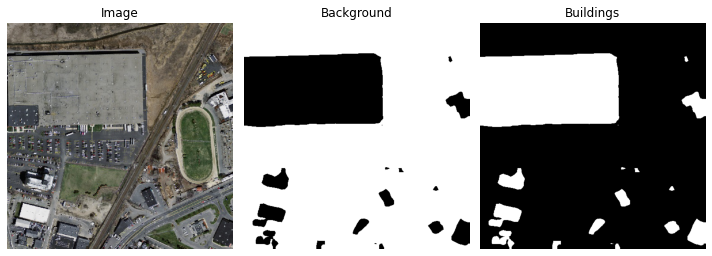

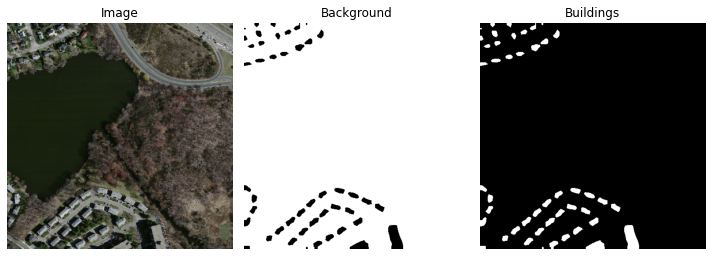

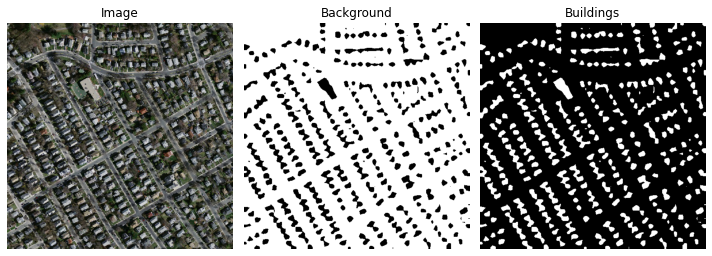

In [10]:
model_path = "./experiments/MassachusettsBuildings/checkpoint.pth.tar"
#labels = MassachusettsBuildingsDataset.labels
labels = ["Background", "Buildings"]
transform = MinMaxNormTranspose()
model.load_model(model_path)

image = image_loader('../data/MassachusettsBuildings/test_splits/24179065_15_0.jpg')
fig = model.predict_masks(image, labels, transform)

image = image_loader('../data/MassachusettsBuildings/test_splits/22829050_15_1.jpg')
fig = model.predict_masks(image, labels, transform)

image = image_loader('../data/MassachusettsBuildings/test_splits/22828930_15_2.jpg')
fig = model.predict_masks(image, labels, transform)